In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("C:\\Users\\chudi\\Downloads\\archive\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
legit=df[df.Class == 0]
fraud=df[df.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legit_demo=legit.sample(n=492)

In [10]:
new_df=pd.concat([legit_demo,fraud],axis=0)

In [11]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
36865,38713.0,-2.256669,-2.376559,1.661815,-0.122488,0.980563,0.379182,-0.166455,0.200152,0.823578,...,-0.342463,0.021787,1.814449,-0.808969,0.171236,1.013724,0.032957,-0.477033,96.56,0
102365,68166.0,0.931768,-0.201526,0.388497,1.408207,-0.369628,0.036616,0.019621,0.154204,0.163132,...,0.006251,-0.039013,-0.116753,0.221278,0.537770,-0.349062,0.012448,0.021479,99.00,0
229401,145909.0,0.150236,1.991161,0.302290,4.846841,0.395248,0.357226,0.021754,0.219704,-0.942561,...,-0.492510,-0.987198,0.136792,-0.297879,-0.402048,0.069804,0.241887,-0.169044,3.75,0
16718,28081.0,-0.708059,0.944429,1.076007,-0.418845,0.451099,0.296981,0.387150,0.357111,-0.212105,...,-0.246625,-0.650433,-0.072429,-0.866565,-0.175950,0.143779,0.371351,0.166796,5.88,0
198745,132632.0,-1.033894,-1.884680,0.099946,-0.421371,1.516385,-1.647800,-0.311666,-0.214375,0.627040,...,0.251334,0.960598,1.067311,0.077826,-2.275508,0.858067,-0.040242,0.313186,30.00,0


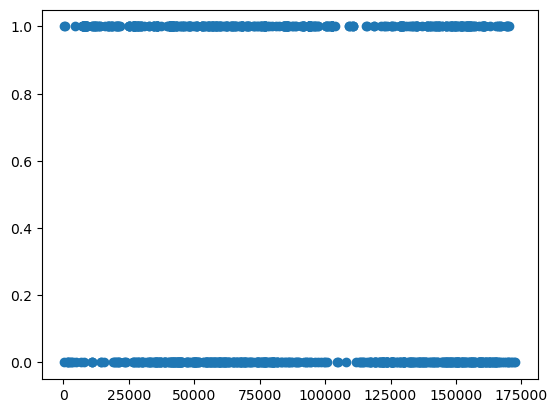

In [12]:
plt.scatter(new_df.Time,new_df.Class)

In [13]:
X=new_df.drop(['Class'],axis=1)
Y=new_df['Class']

In [14]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
36865,38713.0,-2.256669,-2.376559,1.661815,-0.122488,0.980563,0.379182,-0.166455,0.200152,0.823578,...,-0.286285,-0.342463,0.021787,1.814449,-0.808969,0.171236,1.013724,0.032957,-0.477033,96.56
102365,68166.0,0.931768,-0.201526,0.388497,1.408207,-0.369628,0.036616,0.019621,0.154204,0.163132,...,-0.067454,0.006251,-0.039013,-0.116753,0.221278,0.537770,-0.349062,0.012448,0.021479,99.00
229401,145909.0,0.150236,1.991161,0.302290,4.846841,0.395248,0.357226,0.021754,0.219704,-0.942561,...,0.614136,-0.492510,-0.987198,0.136792,-0.297879,-0.402048,0.069804,0.241887,-0.169044,3.75
16718,28081.0,-0.708059,0.944429,1.076007,-0.418845,0.451099,0.296981,0.387150,0.357111,-0.212105,...,0.154922,-0.246625,-0.650433,-0.072429,-0.866565,-0.175950,0.143779,0.371351,0.166796,5.88
198745,132632.0,-1.033894,-1.884680,0.099946,-0.421371,1.516385,-1.647800,-0.311666,-0.214375,0.627040,...,-0.008004,0.251334,0.960598,1.067311,0.077826,-2.275508,0.858067,-0.040242,0.313186,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [15]:
Y

36865     0
102365    0
229401    0
16718     0
198745    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)

In [17]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(984, 30) (787, 30) (197, 30)
(984,) (787,) (197,)


In [18]:
model=LogisticRegression()

In [19]:
model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [21]:
training_accuracy

0.9453621346886912

In [22]:
X_test_prediction=model.predict(X_test)
testdata_accuracy=accuracy_score(X_test_prediction,Y_test)

In [23]:
testdata_accuracy

0.9289340101522843

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm=confusion_matrix(X_test_prediction,Y_test)
cm

array([[98, 12],
       [ 2, 85]], dtype=int64)

Text(33.22222222222222, 0.5, 'truth')

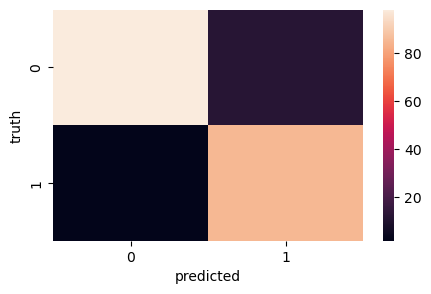

In [26]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm)
plt.xlabel('predicted')
plt.ylabel('truth')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       100
           1       0.98      0.88      0.92        97

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

